In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import yfinance as yf

%config InlineBackend.figure_format = 'retina'

sns.set(style='darkgrid', palette='deep')

plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12

# Задание №1

Скачаем тикеры всех немецких компаний по [ссылке](https://investexcel.net/stocks-traded-german-exchanges/).

In [2]:
companies = pd.read_excel("German Traded Companies.xlsx")
companies = list(companies['Ticker'])

In [3]:
data = yf.download(companies[:2000],'2018-01-02','2018-12-31')[['Close', 'Volume']]
indexes = yf.download(['^GDAXI'],'2018-01-02','2018-12-31')[['Close', 'Volume']]

[*********************100%%**********************]  2000 of 2000 completed

898 Failed downloads:
['TATB.BE', 'QS6A.BE', 'QX9F.BE', 'AOE.BE', 'AGV.BE', 'JUD.BE', 'XT4Y.BE', '9ME.BE', 'ARMA.BE', 'XQP.BE', 'SVJA.BE', 'YS6N.BE', '5PR1.BE', 'PTC.BE', 'TBM.BE', 'X6S.BE', '3VA1.BE', '24W2.BE', 'PDW.BE', 'QFSP.BE', 'PD5.BE', 'JJ1.BE', 'REU1.BE', 'Q86.BE', 'AJM.BE', 'AIY.BE', 'XT3B.BE', 'E2ON.BE', 'ICS1.BE', 'ZB31.BE', 'YC5.BE', 'HIGA.BE', 'A7X1.BE', 'NOC.BE', 'TO7.BE', 'C3A.BE', '77A.BE', '1A7.BE', '3GZA.BE', 'DKC.BE', 'QS5.BE', 'LRH1.BE', 'EQ2.BE', '4A1A.BE', 'WNJ.BE', 'W2P.BE', 'D1U.BE', 'YEL1.BE', 'ZPFK.BE', '33S.BE', '97A.BE', 'AUC.BE', 'LUX.BE', 'SBYA.BE', 'A6VB.BE', 'HOA.BE', 'QKL.BE', 'CI6.BE', 'WPC.BE', 'OLB.BE', 'PJP.BE', '3PE.BE', 'AU5.BE', 'ZZ7B.BE', 'AAQ.BE', '3SY.BE', '1Q8.BE', 'O4V2.BE', 'YZA.BE', 'AST.BE', 'ZCH.BE', 'RZU.BE', 'AID1.BE', 'WRW.BE', 'ABJ.BE', 'SEZ.BE', 'PPA.BE', '6SQA.BE', 'ZAR.BE', '72A.BE', 'XRP1.BE', 'WZM.BE', 'AMY.BE', 'H4M.BE', 'ORY.BE', 'KON.BE', 'ATC.BE', '

In [4]:
prices, volume = data['Close'], data['Volume']
prices = prices.reset_index()
indexes = indexes.reset_index()
volume = volume.reset_index()

to_delete = set(prices['Date'])-set(indexes['Date'])
for i in to_delete:
    prices = prices[prices['Date']!=i]
    volume = volume[volume['Date']!=i]

prices = prices.dropna(axis=1, how='any')
volume = volume.loc[:, prices.columns]

Просмотрим загруженные данные.

In [5]:
prices

Ticker,Date,013A.BE,06MA.BE,0AW.BE,0C2.BE,0CI.BE,0HO.BE,0Q2.BE,0R8.BE,0WP.BE,...,ZVF.BE,ZVR.BE,ZVW.BE,ZVX.BE,ZWC1.BE,ZWS.BE,ZYD.BE,ZYY.BE,ZZG.BE,ZZMS.BE
0,2018-01-02,34.150002,10.315000,17.600000,10.10,0.307,0.0885,30.600000,0.0320,15.085,...,0.226,56.849998,0.772,4.256,53.200001,0.942,10.12,55.980000,3.38,12.30
1,2018-01-03,35.700001,10.500000,17.700001,10.20,0.304,0.0880,31.400000,0.0445,15.045,...,0.236,56.700001,0.780,4.324,53.400002,0.978,10.10,56.400002,3.32,12.40
2,2018-01-04,36.400002,10.100000,18.200001,10.30,0.308,0.0900,32.599998,0.0330,14.610,...,0.240,55.299999,0.834,4.419,53.799999,0.948,10.10,56.200001,3.34,12.40
3,2018-01-05,36.099998,9.950000,18.299999,10.30,0.306,0.0890,32.400002,0.0330,14.760,...,0.246,56.099998,0.842,4.271,54.000000,0.950,10.10,57.000000,3.40,12.60
4,2018-01-08,38.200001,9.850000,18.400000,10.30,0.316,0.0880,31.799999,0.0325,15.065,...,0.240,56.700001,0.934,4.244,53.799999,0.946,9.98,56.200001,3.40,12.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,2018-12-19,18.610001,15.500000,13.580000,12.34,0.211,0.0840,41.580002,0.0190,9.750,...,0.113,36.650002,1.210,2.688,52.000000,1.085,8.44,48.200001,3.72,6.10
251,2018-12-20,17.500000,17.000000,13.580000,12.51,0.209,0.0825,41.000000,0.0190,9.600,...,0.111,35.099998,1.220,2.600,51.799999,1.090,8.24,49.000000,3.69,5.70
252,2018-12-21,17.719999,16.200001,12.430000,12.26,0.206,0.0815,40.549999,0.0190,9.440,...,0.111,34.849998,1.210,2.631,52.599998,1.085,8.20,49.400002,3.69,5.70
255,2018-12-27,18.459999,17.100000,13.260000,12.24,0.205,0.0795,41.430000,0.0190,9.440,...,0.110,35.950001,1.220,2.509,52.599998,1.085,8.12,49.700001,3.69,5.45


In [6]:
volume

Ticker,Date,013A.BE,06MA.BE,0AW.BE,0C2.BE,0CI.BE,0HO.BE,0Q2.BE,0R8.BE,0WP.BE,...,ZVF.BE,ZVR.BE,ZVW.BE,ZVX.BE,ZWC1.BE,ZWS.BE,ZYD.BE,ZYY.BE,ZZG.BE,ZZMS.BE
0,2018-01-02,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-01-03,0.0,150.0,0.0,0.0,0.0,0.0,0.0,29394.0,0.0,...,0.0,0.0,0.0,0.0,0.0,500.0,0.0,0.0,0.0,0.0
2,2018-01-04,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-01-05,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-08,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,2018-12-19,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251,2018-12-20,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
252,2018-12-21,260.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
255,2018-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
indexes

,Date,Close,Volume
0,2018-01-02,12871.389648,86049300
1,2018-01-03,12978.209961,84809300
2,2018-01-04,13167.889648,101199400
3,2018-01-05,13319.639648,112555000
4,2018-01-08,13367.780273,95005300
...,...,...,...
246,2018-12-19,10766.209961,96506200
247,2018-12-20,10611.099609,122450600
248,2018-12-21,10633.820312,216162200
249,2018-12-27,10381.509766,104152600


Сохраним данные.

In [8]:
prices.to_csv('prices.csv')
volume.to_csv('volume.csv')
indexes.to_csv('indexes.csv')

# Чтение данных

In [9]:
prices = pd.read_csv('prices.csv')
volume = pd.read_csv('volume.csv')
indexes = pd.read_csv('indexes.csv')

prices.drop(columns=['Unnamed: 0'], inplace=True)
volume.drop(columns=['Unnamed: 0'], inplace=True)
indexes.drop(columns=['Unnamed: 0'], inplace=True)

# Задание №2

Вычисление логарифмических доходностей.

In [11]:
returns = {}
for i in prices.drop(columns=['Date']).columns:
    returns[i] = np.log(np.array(prices[i])[1:]/np.array(prices[i])[:-1])
returns = pd.DataFrame(returns)

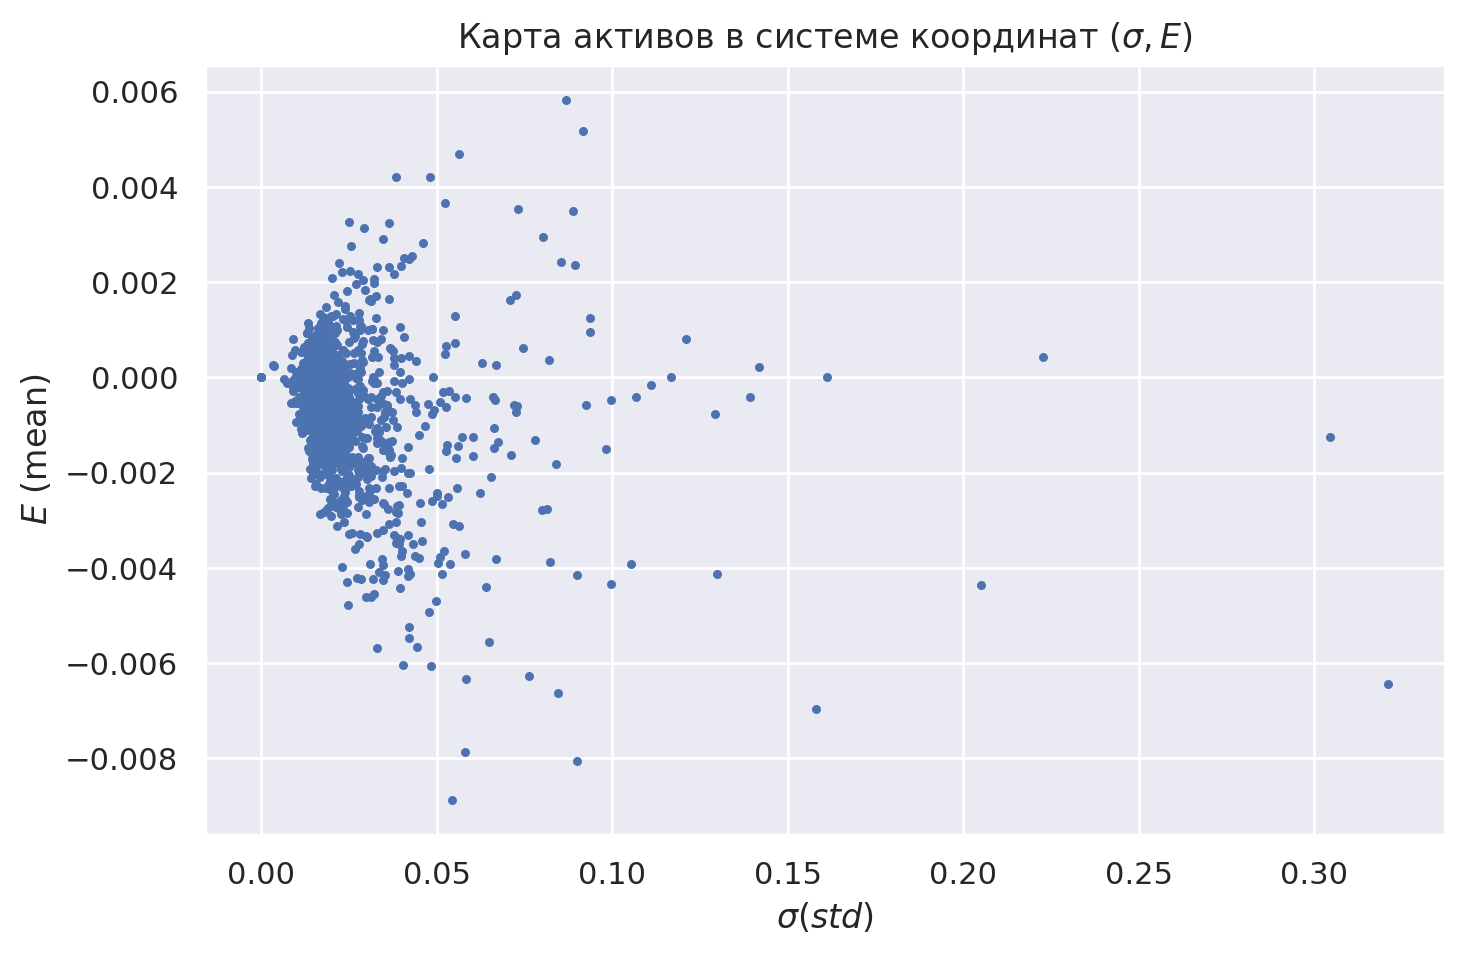

In [14]:
std, mean = returns.std(), returns.mean()
plt.scatter(std, mean, s=5)
plt.xlabel('$\sigma (std)$')
plt.ylabel('$E$ (mean)')
plt.title('Карта активов в системе координат $(\sigma, E)$')
plt.show()

# Задание №3

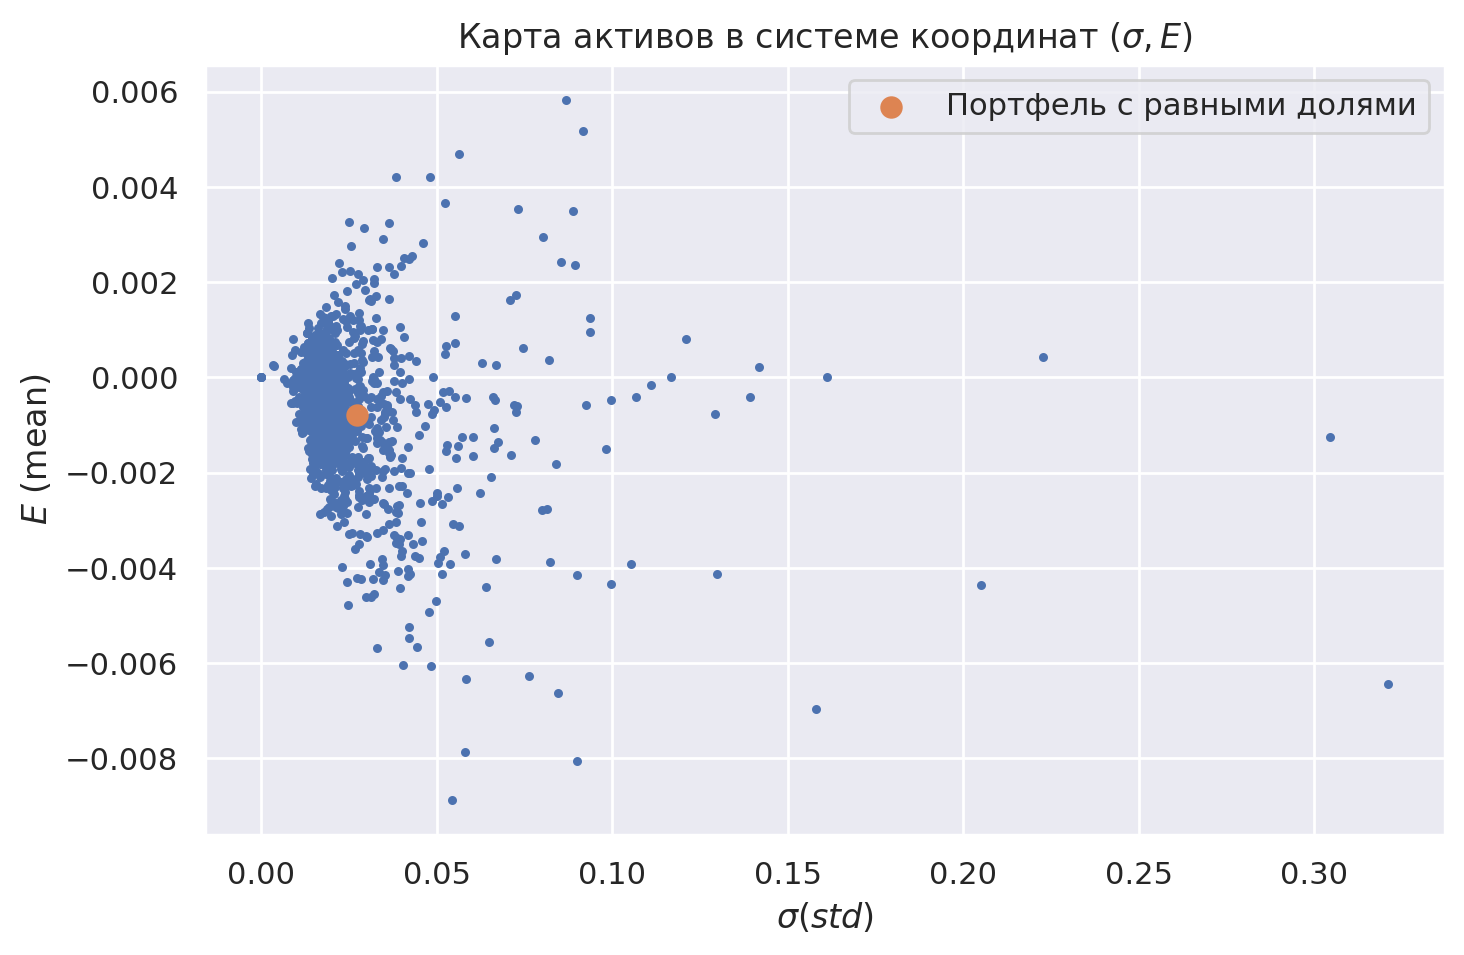

In [54]:
equally_weighted_portfolio_sigma = np.mean(std)
equally_weighted_portfolio_mean = np.mean(mean)

std, mean = returns.std(), returns.mean()
plt.scatter(std, mean, s=5)
plt.scatter([equally_weighted_portfolio_sigma], [equally_weighted_portfolio_mean], s=50, label='Портфель с равными долями')
plt.legend()
plt.xlabel('$\sigma (std)$')
plt.ylabel('$E$ (mean)')
plt.title('Карта активов в системе координат $(\sigma, E)$')
plt.show()

# Задание №4

Рассчитаем логарифмическую доходность для индекса рынка.

In [55]:
indexes_returns = np.log(np.array(indexes['Close'])[1:]/np.array(indexes['Close'])[:-1])
indexes_returns_sigma = np.std(indexes_returns)
indexes_returns_mean = np.mean(indexes_returns)

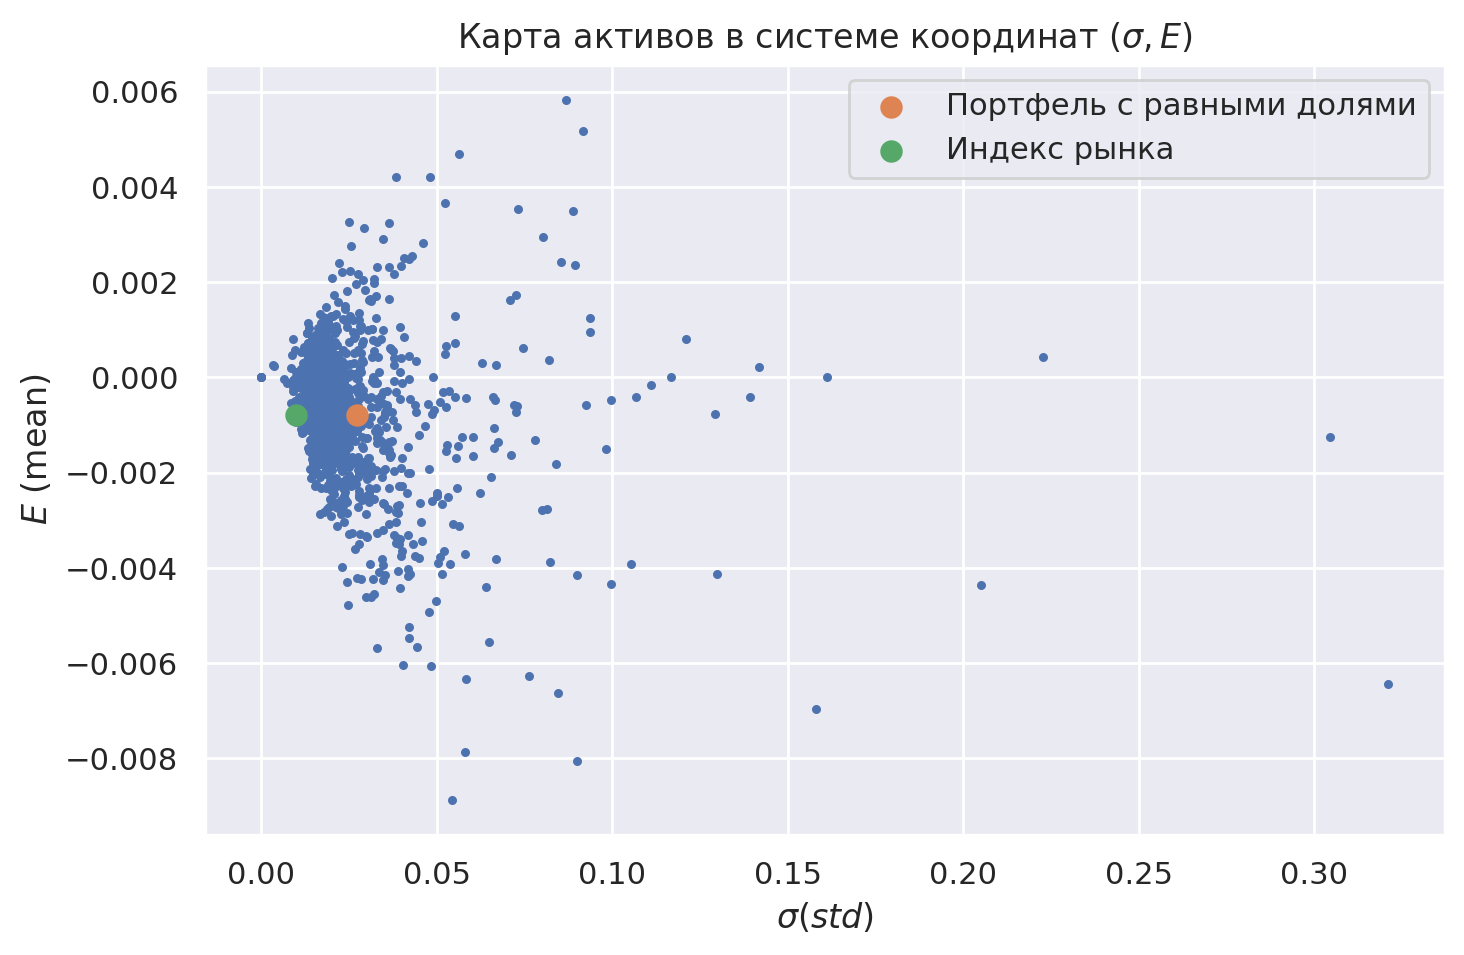

In [56]:
equally_weighted_portfolio_sigma = np.mean(std)
equally_weighted_portfolio_mean = np.mean(mean)

std, mean = returns.std(), returns.mean()
plt.scatter(std, mean, s=5)
plt.scatter([equally_weighted_portfolio_sigma], [equally_weighted_portfolio_mean], s=50, label='Портфель с равными долями')
plt.scatter([indexes_returns_sigma], [indexes_returns_mean], s=50, label='Индекс рынка')
plt.legend()
plt.xlabel('$\sigma (std)$')
plt.ylabel('$E$ (mean)')
plt.title('Карта активов в системе координат $(\sigma, E)$')
plt.show()